## fast.ai v2 library

- [docs](https://docs.fast.ai)

- [kaggle dataset link](https://www.kaggle.com/fantacher/neu-metal-surface-defects-data)

Transfer learning with Resnet18. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
import re
from fastai.vision.all import *

In [100]:
data_src = 'data'
data = ImageDataLoaders.from_folder(data_src, size=200, bs=24)

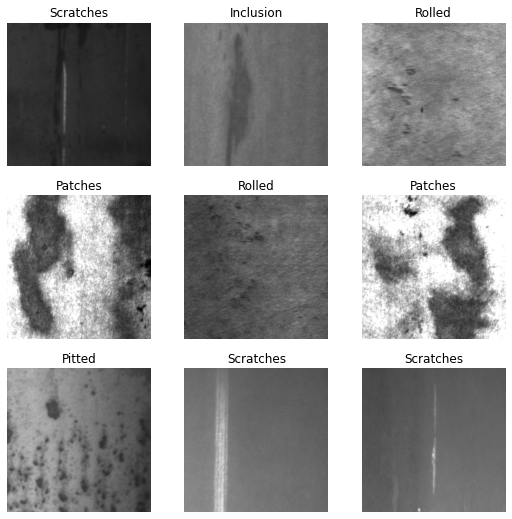

In [112]:
data.show_batch()

In [102]:
# number of classes
data.c

6

In [111]:
# number of train images, number of test images
len(data.train_ds.items), len(data.valid_ds.items)

(1656, 72)

In [6]:
learn = cnn_learner(data, resnet18, metrics=error_rate)

In [7]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.592596,0.001563,0.000000,02:33
1,0.195566,0.000554,0.000000,02:15


In [8]:
learn.save('resnet18_metal_defects')

Path('data/models/resnet18_metal_defects.pth')

In [9]:
interp = ClassificationInterpretation.from_learner(learn)

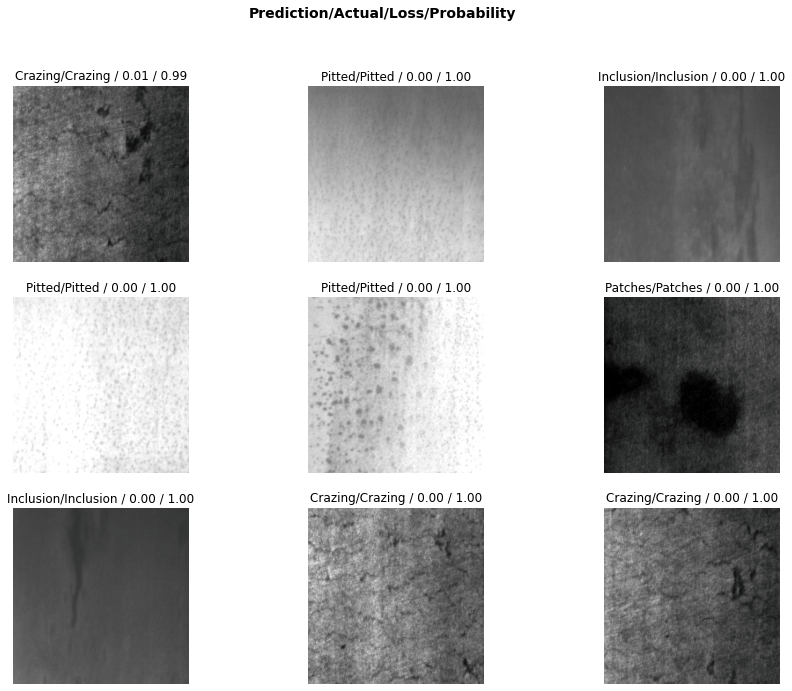

In [32]:
interp.plot_top_losses(9, figsize=(15,11))

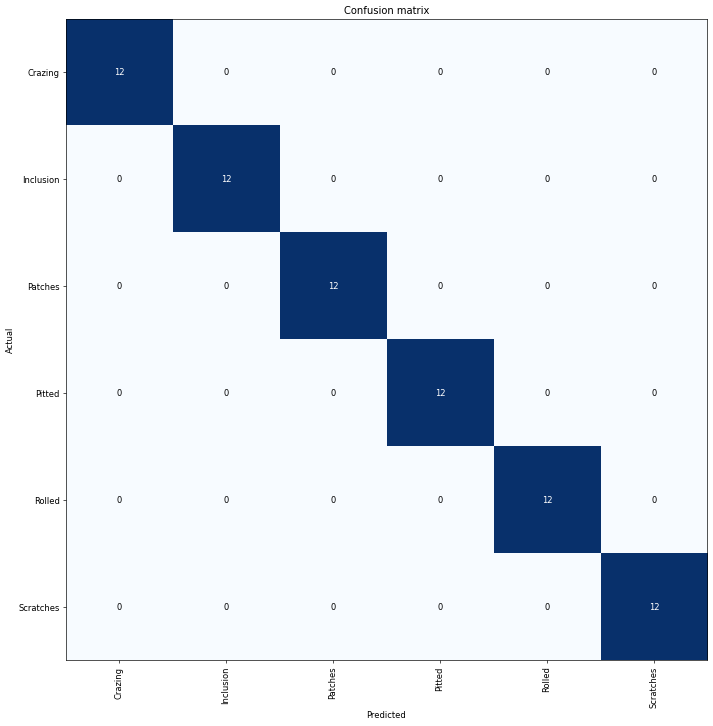

In [120]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [113]:
test_imgs = get_image_files('data/test')
test_dl = learn.dls.test_dl(test_imgs)

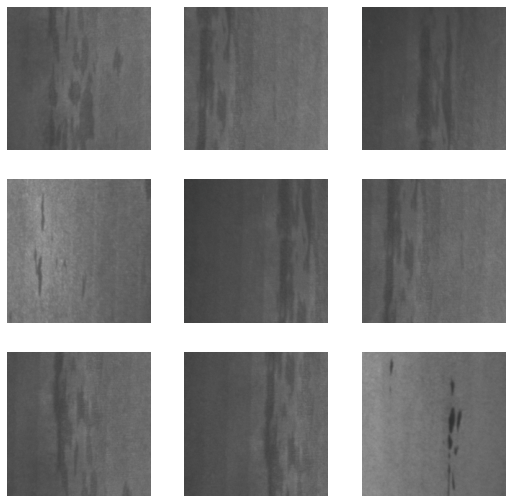

In [114]:
test_dl.show_batch()

In [115]:
# number of test images
len(test_dl.items)

72

In [116]:
_, _, preds = learn.get_preds(dl=test_dl, with_decoded=True)

In [117]:
labels_preds = [learn.dls.vocab[i] for i in preds]
pat = r'data/test/(\S+)/\S+_\d+.bmp$'
labels_actual = [re.search(pat, str(p)).group(1) for p in test_imgs]

In [118]:
# we have correctly predicted all test images
test_eq(labels_preds, labels_actual)